In [ ]:
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
X = iris.drop('species', axis = 1)

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y = iris['species']

In [ ]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_cl = LogisticRegression()
rf_cl = RandomForestClassifier()
svm_cl = SVC()


In [ ]:
voting_cl = VotingClassifier(estimators= [('lr', log_cl), ('rf', rf_cl), ('svc', svm_cl)], voting='hard')
voting_cl.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [ ]:
from sklearn.metrics import accuracy_score
for cl in (log_cl, rf_cl, svm_cl, voting_cl):
  cl.fit(X_train, y_train)
  y_pred = cl.predict(X_test)
  print(cl.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9777777777777777
RandomForestClassifier 0.9777777777777777
SVC 0.9777777777777777
VotingClassifier 0.9777777777777777


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_cl = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True)
bag_cl.fit(X_train, y_train)
y_pred = bag_cl.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.9777777777777777


In [ ]:
# 샘플 사이즈가 아니라 비율을 지정
bag_cl = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 0.6, bootstrap = True)
bag_cl.fit(X_train, y_train)
y_pred = bag_cl.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [ ]:
bag_cl2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, oob_score = True)
bag_cl2.fit(X_train, y_train)

print(bag_cl2.oob_score_)

0.9523809523809523


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_t = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators = 500, random_state = 1)
ada_t.fit(X_train, y_train)
y_train_pred = ada_t.predict(X_train)
y_test_pred = ada_t.predict(X_test)

from sklearn.metrics import accuracy_score
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print("Adaboost train/test accuracy %0.3f/%0.3f" %(ada_train, ada_test))

Adaboost train/test accuracy 1.000/0.978


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier( n_estimators = 5, max_depth = 2)
gbcl.fit(X_train, y_train)
accuracies=[accuracy_score(y_test, y_pred) for y_pred in gbcl.staged_predict(X_test)]

accuracies

[0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

In [ ]:
import numpy as np
best_n_estimator = np.argmax(accuracies)
best_n_estimator
gbcl_best = GradientBoostingClassifier(max_depth=2, n_estimators=best_n_estimator)
gbcl_best.fit(X_train, y_train)
y_train_pred = gbcl_best.predict(X_train)
y_test_pred = gbcl_best.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9555555555555556


In [ ]:
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                    'python-machine-learning-book-2nd-edition'
                    '/master/code/ch10/housing.data.txt', header=None, sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
X=house[['LSTAT']].values
y=house[['MEDV']].values

In [ ]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


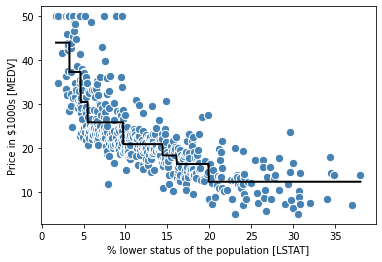

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
  plt.plot(X, model.predict(X), color ='black', lw=2)
  return None

import matplotlib.pyplot as plt
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show() 

In [ ]:
 X = house.iloc[:, :-1].values
 y = house['MEDV'].values

 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

 from sklearn.ensemble import RandomForestRegressor
 forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1)
 forest.fit(X_train, y_train)
 y_train_pred = forest.predict(X_train)
 y_test_pred = forest.predict(X_test)

 from sklearn.metrics import mean_squared_error
 from sklearn.metrics import r2_score

 print('MSE train : %0.3f, test: %0.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
 print('R**2 train : %0.3f, test: %0.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
 

MSE train : 1.582, test: 8.264
R**2 train : 0.981, test: 0.910


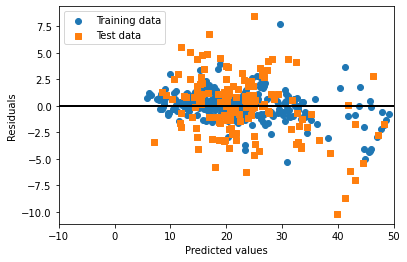

In [ ]:
plt.scatter(y_train_pred, y_train_pred - y_train, marker='o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, marker='s', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y=0, xmin=-10, xmax = 50, lw=2)
plt.xlim([-10, 50])
plt.show()

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', booster = 'gbtree', colsample_bytree=0.80, learning_rate=0.1, max_depth=3, alpha = 10, n_estimators=50)
xg_reg.fit(X_train, y_train)
pred_train = xg_reg.predict(X_train)
pred_test = xg_reg.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print('RMSE train: %0.3f, test: %0.3f.' %(rmse_train, rmse_test))

RMSE train: 2.011, test: 3.134.


In [ ]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print('MSE train: %0.3f, test: %0.3f.' %(mse_train, mse_test))

MSE train: 4.044, test: 9.822.


In [ ]:
paras = {'objective':'reg:squarederror', 'colsample_bytree':0.6, 'max_depth': 5, 'alpha':10,}
data_dim1= xgb.DMatrix(data = X_train, label = y_train)
cv_result = xgb.cv(dtrain = data_dim1, params = paras, nfold = 5, num_boost_round = 60, early_stopping_rounds=20, metrics = 'rmse', as_pandas = True, seed = 1)
cv_result.head(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.164081,0.217703,17.333974,1.186204
1,12.636279,0.130156,12.931914,1.279096
2,9.460948,0.088331,9.860570,1.286133
3,7.261621,0.039638,7.872672,1.216185
4,5.697459,0.062204,6.600069,1.238524
5,4.591223,0.074477,5.668689,1.228803
6,3.846055,0.039706,5.170993,1.169650
7,3.314620,0.052959,4.898520,1.167288
8,2.953268,0.069006,4.692796,1.141778
9,2.683434,0.057863,4.551099,1.100344


In [ ]:
print(cv_result['test-rmse-mean'].tail(1))

59    3.970484
Name: test-rmse-mean, dtype: float64
